In [1]:
import pandas as pd
import numpy as np

# Project introduction

In 2019, the leisure tourism sector witnessed an impressive expenditure of $4.72 trillion, highlighting its immense potential for investment opportunities. Our objective is to thoroughly analyze and identify the most profitable location for investors keen on capitalizing in this market. Specifically, we are focusing on properties that can be transformed into Airbnb accommodations, catering exclusively to tourists seeking short-term stays. This analysis will exclude hotels and other long-term options, concentrating instead on apartments and houses, since our investor is average investor and not a company, and therefore the listings used for this calculation are also average rentals and not very expensive ones. 

# Data Preperation

## Data cleaning

In [2]:
# generate two data frames containing all of the listing and calendar data for each location
import os
import pandas as pd

directory_path = 'home_rentals/'

# Initialize an empty list to store DataFrames
listing_df = []
calendar_df = []

# Iterate through subdirectories
for subdirectory in os.listdir(directory_path):
    subdirectory_path = os.path.join(directory_path, subdirectory) 

    csv_listing_file_path = os.path.join(subdirectory_path, "listings.csv.gz")
    csv_calendar_file_path = os.path.join(subdirectory_path, "calendar.csv.gz")
    print(csv_listing_file_path)
    print(csv_calendar_file_path)

    df1 = pd.read_csv(csv_listing_file_path)
    df2 = pd.read_csv(csv_calendar_file_path)

    df1['location'] = subdirectory
    df2['location'] = subdirectory

    listing_df.append(df1)
    calendar_df.append(df2)


# Concatenate all DataFrames into a single DataFrame
all_listing_df = pd.concat(listing_df, ignore_index=True)
all_calendar_df = pd.concat(calendar_df, ignore_index=True)

home_rentals/Zurich/listings.csv.gz
home_rentals/Zurich/calendar.csv.gz
home_rentals/Barcelona/listings.csv.gz
home_rentals/Barcelona/calendar.csv.gz
home_rentals/Milan/listings.csv.gz
home_rentals/Milan/calendar.csv.gz
home_rentals/Valencia/listings.csv.gz
home_rentals/Valencia/calendar.csv.gz
home_rentals/Mallorca/listings.csv.gz
home_rentals/Mallorca/calendar.csv.gz
home_rentals/Washington/listings.csv.gz
home_rentals/Washington/calendar.csv.gz
home_rentals/Rotterdam/listings.csv.gz
home_rentals/Rotterdam/calendar.csv.gz
home_rentals/Tokyo/listings.csv.gz
home_rentals/Tokyo/calendar.csv.gz
home_rentals/Los Angeles/listings.csv.gz
home_rentals/Los Angeles/calendar.csv.gz
home_rentals/Lisbon/listings.csv.gz
home_rentals/Lisbon/calendar.csv.gz
home_rentals/Ireland/listings.csv.gz
home_rentals/Ireland/calendar.csv.gz
home_rentals/Mexico City/listings.csv.gz
home_rentals/Mexico City/calendar.csv.gz
home_rentals/Madrid/listings.csv.gz
home_rentals/Madrid/calendar.csv.gz
home_rentals/Genev

In [3]:
all_calendar_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,location
0,73282,2022-09-23,f,$100.00,$100.00,1125.0,1125.0,Zurich
1,73282,2022-09-24,f,$100.00,$100.00,1125.0,1125.0,Zurich
2,73282,2022-09-25,f,$100.00,$100.00,1125.0,1125.0,Zurich
3,73282,2022-09-26,f,$100.00,$100.00,1125.0,1125.0,Zurich
4,73282,2022-09-27,f,$100.00,$100.00,1125.0,1125.0,Zurich
...,...,...,...,...,...,...,...,...
124889345,1825432,2023-09-24,t,$150.00,$140.00,2.0,1125.0,Malaga
124889346,1825432,2023-09-25,t,$150.00,$140.00,2.0,1125.0,Malaga
124889347,1825432,2023-09-26,t,$150.00,$140.00,2.0,1125.0,Malaga
124889348,1825432,2023-09-27,t,$150.00,$140.00,2.0,1125.0,Malaga


In [4]:
all_listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### Removing Irrelevant columns 

Since this dataset has a lot of variables, we can start by removing colums that will be clearly irrelevant for our research question such as the following:

- *'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_thumbnail_url', host_url', 'host_name'*  = Identifier variables
-  *'name', 'description', 'neighborhood_overview', 'host_about', 'bathrooms_text'*  = We will not be working with textual data for this analysis, for the sake of efficiency and time
- *'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude', region_name', 'region_parent_id', 'region_parent_name','region_parent_parent_id', 'region_parent_parent_name'* = We will only be using Country in our analysis as a geographic identifier, in order to reduce the dimension of our data while keeping some identifiabiltiy (since there are 20 countries)
- *'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365'* = These are variables that will be dependant on our predictor variable in this analysis 

In [5]:
columns_drop = ['scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_thumbnail_url', 'host_url','name', 
                    'description', 'neighborhood_overview', 'host_about', 'bathrooms_text', 'neighbourhood',
                      'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude',
                    'region_name', 'region_parent_id', 'region_parent_name','region_parent_parent_id', 'region_parent_parent_name',
                      'has_availability', 'availability_60', 'availability_90', 
                      
                      'host_id','host_url', 'host_name', 'host_since', 'host_location', 'host_about',
                      'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                      'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
                      'host_neighbourhood', 'host_listings_count',
                      'host_total_listings_count', 'host_verifications',
                      'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count',
                      'calculated_host_listings_count_entire_homes',
                      'calculated_host_listings_count_private_rooms',
                      'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'listing_url',
                       'minimum_minimum_nights', 'maximum_minimum_nights',
                      'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                      'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
                      'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                      'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'requires_license', 
                      'instant_bookable', 'last_searched', 'region_id', 'listings.csv', 'beds', 'bedrooms']

all_listing_df_1 = all_listing_df.drop(columns=columns_drop) 

### Remove rows and columns that have significant amount of NAN values 
 

In [6]:
all_listing_df_1 


,id,property_type,room_type,accommodates,bathrooms,amenities,price,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_365,location
0,73282.0,Entire rental unit,Entire home/apt,4.0,NaN,"[""Essentials"", ""Kitchen"", ""Hot tub"", ""Lake acc...",$100.00,1125.0,1125.0,NaN,23.0,358.0,Zurich
1,86645.0,Entire rental unit,Entire home/apt,3.0,NaN,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",$184.00,1.0,9999.0,NaN,0.0,0.0,Zurich
2,143821.0,Entire loft,Entire home/apt,2.0,NaN,"[""Essentials"", ""Stove"", ""Wifi"", ""Long term sta...",$200.00,3.0,365.0,NaN,0.0,145.0,Zurich
3,178448.0,Private room in rental unit,Private room,1.0,NaN,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",$60.00,5.0,31.0,NaN,0.0,221.0,Zurich
4,204586.0,Private room in rental unit,Private room,1.0,NaN,"[""Kitchen"", ""Indoor fireplace"", ""Free parking ...",$200.00,3.0,6.0,NaN,29.0,364.0,Zurich
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342231,50352276.0,Entire rental unit,Entire home/apt,6.0,NaN,"[""Heating"", ""Private patio or balcony"", ""Dishe...",$265.00,21.0,60.0,NaN,0.0,0.0,Malaga
342232,32705544.0,Entire rental unit,Entire home/apt,2.0,NaN,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",$31.00,5.0,1125.0,NaN,3.0,3.0,Malaga
342233,33294303.0,Entire rental unit,Entire home/apt,4.0,NaN,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",$90.00,3.0,1125.0,NaN,0.0,2.0,Malaga
342234,50607554.0,Tiny home,Entire home/apt,4.0,NaN,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""Pri...",$112.00,3.0,1125.0,NaN,0.0,0.0,Malaga


In [7]:
#remove all columnns with more than 50% of NaN values 
all_listing_df_2 = all_listing_df_1.dropna(thresh=0.5*len(all_listing_df_1), axis=1)
all_listing_df_2

,id,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,location
0,73282.0,Entire rental unit,Entire home/apt,4.0,"[""Essentials"", ""Kitchen"", ""Hot tub"", ""Lake acc...",$100.00,1125.0,1125.0,23.0,358.0,Zurich
1,86645.0,Entire rental unit,Entire home/apt,3.0,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",$184.00,1.0,9999.0,0.0,0.0,Zurich
2,143821.0,Entire loft,Entire home/apt,2.0,"[""Essentials"", ""Stove"", ""Wifi"", ""Long term sta...",$200.00,3.0,365.0,0.0,145.0,Zurich
3,178448.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",$60.00,5.0,31.0,0.0,221.0,Zurich
4,204586.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Indoor fireplace"", ""Free parking ...",$200.00,3.0,6.0,29.0,364.0,Zurich
...,...,...,...,...,...,...,...,...,...,...,...
342231,50352276.0,Entire rental unit,Entire home/apt,6.0,"[""Heating"", ""Private patio or balcony"", ""Dishe...",$265.00,21.0,60.0,0.0,0.0,Malaga
342232,32705544.0,Entire rental unit,Entire home/apt,2.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",$31.00,5.0,1125.0,3.0,3.0,Malaga
342233,33294303.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",$90.00,3.0,1125.0,0.0,2.0,Malaga
342234,50607554.0,Tiny home,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""Pri...",$112.00,3.0,1125.0,0.0,0.0,Malaga


In [8]:
removed_columns=[col for col in all_listing_df_1 if col not in all_listing_df_2]

print(f'the columns removed are {removed_columns}')

the columns removed are ['bathrooms', 'calendar_updated']


In [9]:
#After removing all the columns with more than 50% of NaN values we are now going to look at rows and remove those too
threshold = 0.70 
all_listing_df_3 = all_listing_df_2.dropna(thresh=float(threshold * len(all_listing_df_2.columns)))
removed_rows = len(all_listing_df_2) - len(all_listing_df_3)
print(f'num of removed rows is {removed_rows}')

all_listing_df_3

num of removed rows is 1


,id,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,location
0,73282.0,Entire rental unit,Entire home/apt,4.0,"[""Essentials"", ""Kitchen"", ""Hot tub"", ""Lake acc...",$100.00,1125.0,1125.0,23.0,358.0,Zurich
1,86645.0,Entire rental unit,Entire home/apt,3.0,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",$184.00,1.0,9999.0,0.0,0.0,Zurich
2,143821.0,Entire loft,Entire home/apt,2.0,"[""Essentials"", ""Stove"", ""Wifi"", ""Long term sta...",$200.00,3.0,365.0,0.0,145.0,Zurich
3,178448.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",$60.00,5.0,31.0,0.0,221.0,Zurich
4,204586.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Indoor fireplace"", ""Free parking ...",$200.00,3.0,6.0,29.0,364.0,Zurich
...,...,...,...,...,...,...,...,...,...,...,...
342231,50352276.0,Entire rental unit,Entire home/apt,6.0,"[""Heating"", ""Private patio or balcony"", ""Dishe...",$265.00,21.0,60.0,0.0,0.0,Malaga
342232,32705544.0,Entire rental unit,Entire home/apt,2.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",$31.00,5.0,1125.0,3.0,3.0,Malaga
342233,33294303.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",$90.00,3.0,1125.0,0.0,2.0,Malaga
342234,50607554.0,Tiny home,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""Pri...",$112.00,3.0,1125.0,0.0,0.0,Malaga


In [10]:
all_listing_df_3["room_type"].value_counts()

Entire home/apt    244135
Private room        91261
Shared room          3788
Hotel room           3051
Name: room_type, dtype: int64

In [11]:
# remove hotel rooms since they are irrelevant to our investors 
all_listing_df_4 = all_listing_df_3[all_listing_df_3['room_type'] != 'Hotel room']
all_listing_df_4["room_type"].value_counts()


Entire home/apt    244135
Private room        91261
Shared room          3788
Name: room_type, dtype: int64

In [12]:
all_listing_df_4["property_type"].value_counts()


Entire rental unit             121893
Entire home                     36243
Private room in rental unit     34444
Entire condo                    33638
Private room in home            21393
                                ...  
Shared room in train                1
Private room in ranch               1
Shared room in tower                1
Trullo                              1
Shared room in floor                1
Name: property_type, Length: 150, dtype: int64

In [13]:
check_hotel_listed_as_private_room_df = all_listing_df_4[all_listing_df_4["property_type"] == "Room in hotel"]

check_hotel_listed_as_private_room_df["room_type"].value_counts()

Private room       3126
Entire home/apt       3
Name: room_type, dtype: int64

In [14]:
# remove hotels hiding within propety type 
filtered_df = all_listing_df_4[~all_listing_df_4['property_type'].str.contains(
    'hotel', case=False, na=False)]

In [15]:
# Calculate the proportion of each property type
property_type_counts = filtered_df['property_type'].value_counts(
    normalize=True)

# Set the threshold for the proportion  (0.005)
threshold = 0.005

# Get property types that meet the threshold
selected_property_types = property_type_counts[property_type_counts >= threshold].index

# Create all_listing_df_3 by filtering based on selected property types
all_listing_df_5 = filtered_df[filtered_df['property_type'].isin(
    selected_property_types)]

After removing hotels we found that there are "Rooms in Hotel" etc so we had to remove those as well

In [16]:
all_listing_df_5["property_type"].value_counts()

Entire rental unit                   121893
Entire home                           36243
Private room in rental unit           34444
Entire condo                          33638
Private room in home                  21393
Entire villa                           9502
Entire loft                            7446
Private room in condo                  7356
Private room in bed and breakfast      6463
Entire serviced apartment              6026
Entire guest suite                     5967
Entire townhouse                       5039
Entire guesthouse                      4210
Entire cottage                         4184
Private room in townhouse              2711
Entire vacation home                   2194
Entire bungalow                        2012
Private room in guest suite            1810
Name: property_type, dtype: int64

In [17]:
# filtered_property_types = filtered_df['property_type'].unique()

# # Filter out rows in all_listing_df_4 where 'property_type' matches any in filtered_property_types
# all_listing_df_5 = all_listing_df_4[~all_listing_df_4['property_type'].isin(
#     filtered_property_types)]

# Display the resulting DataFrame
removed_rows = len(all_listing_df_4) - len(all_listing_df_5)
removed_property_types = len(
    all_listing_df_4['property_type'].unique()) - len(all_listing_df_5['property_type'].unique())

print(f'num of removed rows is {removed_rows}')
print(f'number of property types removed {removed_property_types}')

all_listing_df_5

num of removed rows is 26653
number of property types removed 132


,id,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,location
0,73282.0,Entire rental unit,Entire home/apt,4.0,"[""Essentials"", ""Kitchen"", ""Hot tub"", ""Lake acc...",$100.00,1125.0,1125.0,23.0,358.0,Zurich
1,86645.0,Entire rental unit,Entire home/apt,3.0,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",$184.00,1.0,9999.0,0.0,0.0,Zurich
2,143821.0,Entire loft,Entire home/apt,2.0,"[""Essentials"", ""Stove"", ""Wifi"", ""Long term sta...",$200.00,3.0,365.0,0.0,145.0,Zurich
3,178448.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",$60.00,5.0,31.0,0.0,221.0,Zurich
4,204586.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Indoor fireplace"", ""Free parking ...",$200.00,3.0,6.0,29.0,364.0,Zurich
...,...,...,...,...,...,...,...,...,...,...,...
342230,32328992.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",$72.00,5.0,90.0,4.0,5.0,Malaga
342231,50352276.0,Entire rental unit,Entire home/apt,6.0,"[""Heating"", ""Private patio or balcony"", ""Dishe...",$265.00,21.0,60.0,0.0,0.0,Malaga
342232,32705544.0,Entire rental unit,Entire home/apt,2.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",$31.00,5.0,1125.0,3.0,3.0,Malaga
342233,33294303.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",$90.00,3.0,1125.0,0.0,2.0,Malaga


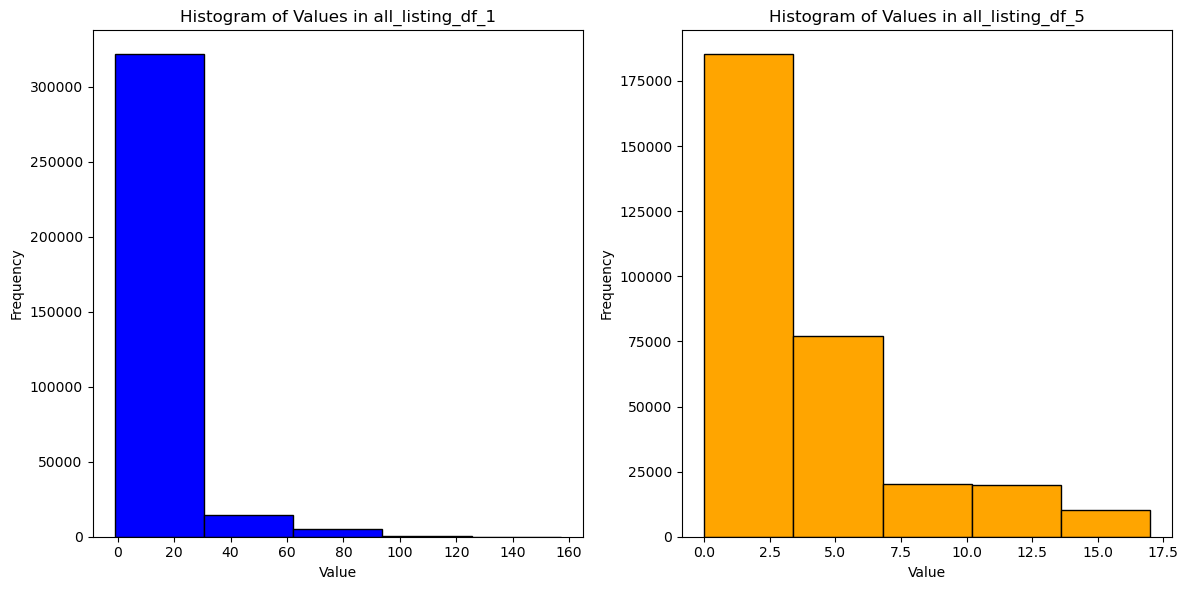

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

temp_df_1 = all_listing_df_1.copy()
temp_df_5 = all_listing_df_5.copy()

# Factorize 'property_type' for temporary DataFrames
temp_df_1['property_type'] = pd.factorize(temp_df_1['property_type'])[0]
temp_df_5['property_type'] = pd.factorize(temp_df_5['property_type'])[0]

plt.figure(figsize=(12, 6))

# Plot the histogram of 'property_type' in all_listing_df_1
plt.subplot(1, 2, 1)
temp_df_1['property_type'].plot(kind='hist', bins=5, edgecolor='black', color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values in all_listing_df_1')

# Plot the histogram of 'property_type' in all_listing_df_5
plt.subplot(1, 2, 2)
temp_df_5['property_type'].plot(kind='hist', bins=5, edgecolor='black', color='orange')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values in all_listing_df_5')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
all_listing_df_5["room_type"].value_counts()

Entire home/apt    238354
Private room        74177
Name: room_type, dtype: int64

Now, we are going to check that there are no erros in availability (e.g. that no property is available for more than 30 days per month)

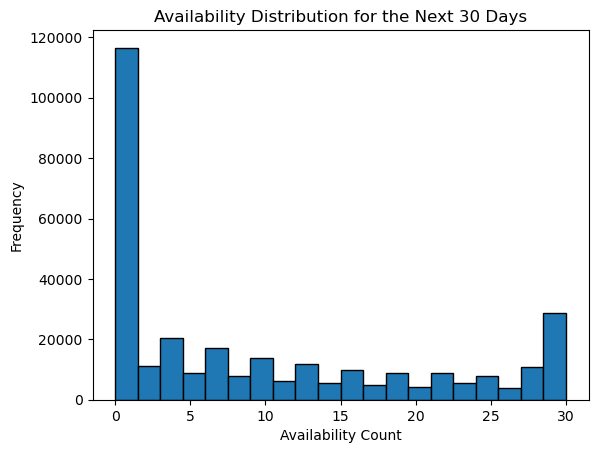

In [20]:
import matplotlib.pyplot as plt

plt.hist(all_listing_df_5["availability_30"], bins=20, edgecolor='black')  
plt.title("Availability Distribution for the Next 30 Days")
plt.xlabel("Availability Count")
plt.ylabel("Frequency")
plt.show()


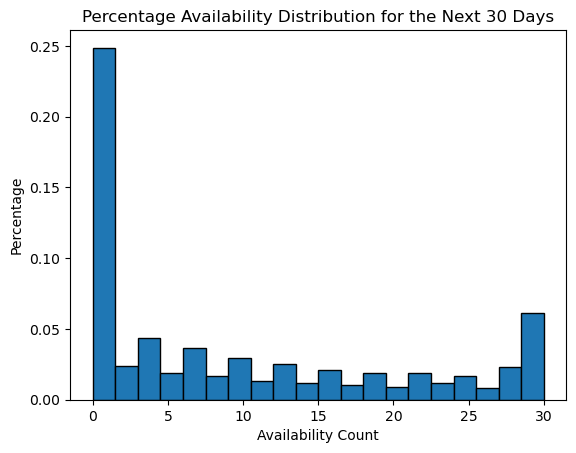

In [21]:
import matplotlib.pyplot as plt

# Assuming all_listing_df_5 is your DataFrame
plt.hist(all_listing_df_5["availability_30"], bins=20, density=True, edgecolor='black')  # density=True for percentage histogram
plt.title("Percentage Availability Distribution for the Next 30 Days")
plt.xlabel("Availability Count")
plt.ylabel("Percentage")
plt.show()


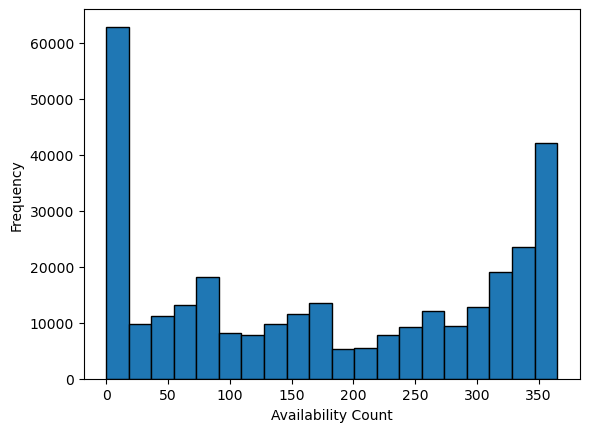

In [22]:
import matplotlib.pyplot as plt
plt.hist(all_listing_df_5["availability_365"], bins=20, edgecolor='black')  
plt.xlabel("Availability Count")
plt.ylabel("Frequency")
plt.show()


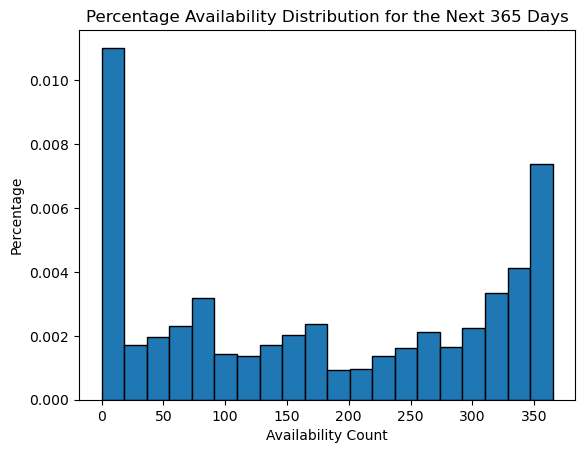

In [23]:
import matplotlib.pyplot as plt

# Assuming all_listing_df_5 is your DataFrame
plt.hist(all_listing_df_5["availability_365"], bins=20, density=True, edgecolor='black')  # density=True for percentage histogram
plt.title("Percentage Availability Distribution for the Next 365 Days")
plt.xlabel("Availability Count")
plt.ylabel("Percentage")
plt.show()


Since we focus on properties that are going to be rented out for short term stays (targeting tourists) we will now look at the minimum_nights column, and remove all properties that have a high requested minimum_nights (since these would be long term stays)

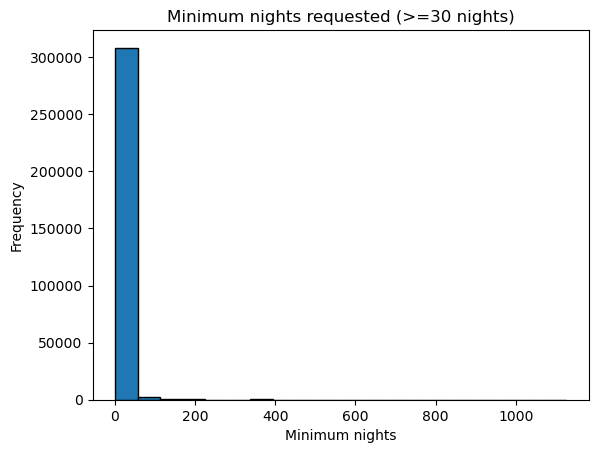

In [24]:
import matplotlib.pyplot as plt

plt.hist(all_listing_df_5["minimum_nights"], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Minimum nights requested (>=30 nights)")
plt.xlabel("Minimum nights")
plt.ylabel("Frequency")
plt.show()

##we can see that there are minimum nights close to 400 nights


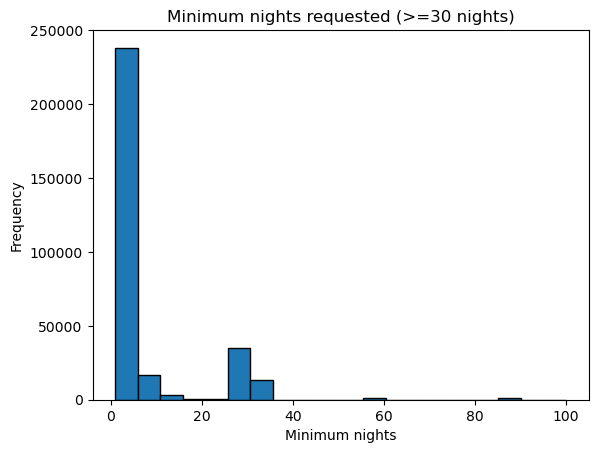

In [25]:
import matplotlib.pyplot as plt
filtered_df = all_listing_df_5[all_listing_df_5["minimum_nights"] <= 100]

plt.hist(filtered_df["minimum_nights"], bins=20, edgecolor='black') 
plt.title("Minimum nights requested (>=30 nights)")
plt.xlabel("Minimum nights")
plt.ylabel("Frequency")
plt.show()


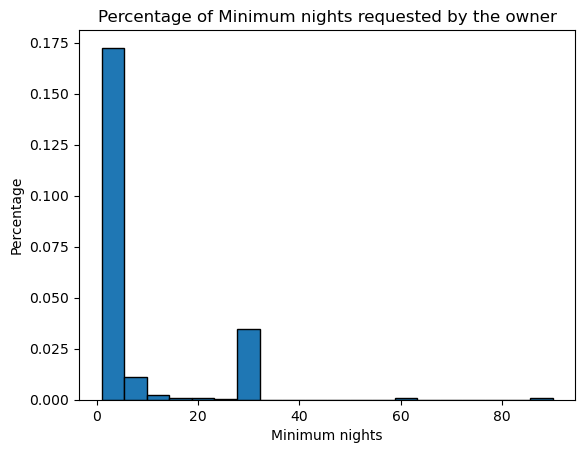

In [26]:
# Assuming all_listing_df_5 is your DataFrame
filtered_df = all_listing_df_5[all_listing_df_5["minimum_nights"] <= 90]
plt.hist(filtered_df["minimum_nights"], bins=20, density=True, edgecolor='black')  # density=True for percentage histogram
plt.title("Percentage of Minimum nights requested by the owner")
plt.xlabel("Minimum nights")
plt.ylabel("Percentage")
plt.show()

In [27]:
# Assuming all_listing_df_5 is your DataFrame

all_listing_df_5["minimum_nights"] = all_listing_df_5["minimum_nights"].astype(int)

counts = all_listing_df_5["minimum_nights"].value_counts(bins=range(0, max(all_listing_df_5["minimum_nights"]) + 31, 30))

# Calculate the percentage column
percentage_column = (counts / len(all_listing_df_5)) * 100

# Create a new DataFrame with counts and percentage_column
result_df = pd.DataFrame({'Counts': counts, 'Percentage': percentage_column})

# Print or display the result DataFrame
print(result_df)


                  Counts  Percentage
(-0.001, 30.0]    294842   94.340081
(30.0, 60.0]       14309    4.578426
(60.0, 90.0]        1315    0.420758
(90.0, 120.0]        509    0.162864
(150.0, 180.0]       487    0.155825
(360.0, 390.0]       463    0.148145
(180.0, 210.0]       124    0.039676
(120.0, 150.0]       113    0.036156
(270.0, 300.0]       102    0.032637
(330.0, 360.0]        70    0.022398
(990.0, 1020.0]       56    0.017918
(480.0, 510.0]        32    0.010239
(1110.0, 1140.0]      25    0.007999
(210.0, 240.0]        22    0.007039
(240.0, 270.0]        21    0.006719
(570.0, 600.0]         7    0.002240
(720.0, 750.0]         6    0.001920
(690.0, 720.0]         6    0.001920
(390.0, 420.0]         6    0.001920
(300.0, 330.0]         6    0.001920
(780.0, 810.0]         4    0.001280
(420.0, 450.0]         2    0.000640
(930.0, 960.0]         1    0.000320
(1080.0, 1110.0]       1    0.000320
(450.0, 480.0]         1    0.000320
(870.0, 900.0]         1    0.000320
(

We can see that more than 98% of all properties have requested a minimum stay of below 60. Therefore it makes sense to remove anything with minimum_nights requested above 60.  

In [28]:
# Assuming all_listing_df_5 is your DataFrame
all_listing_df_6 = all_listing_df_5[all_listing_df_5["minimum_nights"] <= 60]

#Display the filtered DataFrame
all_listing_df_6


,id,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,location
1,86645.0,Entire rental unit,Entire home/apt,3.0,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",$184.00,1,9999.0,0.0,0.0,Zurich
2,143821.0,Entire loft,Entire home/apt,2.0,"[""Essentials"", ""Stove"", ""Wifi"", ""Long term sta...",$200.00,3,365.0,0.0,145.0,Zurich
3,178448.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",$60.00,5,31.0,0.0,221.0,Zurich
4,204586.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Indoor fireplace"", ""Free parking ...",$200.00,3,6.0,29.0,364.0,Zurich
5,222565.0,Private room in home,Private room,3.0,"[""Wifi"", ""Long term stays allowed"", ""Microwave...",$69.00,2,30.0,0.0,208.0,Zurich
...,...,...,...,...,...,...,...,...,...,...,...
342230,32328992.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",$72.00,5,90.0,4.0,5.0,Malaga
342231,50352276.0,Entire rental unit,Entire home/apt,6.0,"[""Heating"", ""Private patio or balcony"", ""Dishe...",$265.00,21,60.0,0.0,0.0,Malaga
342232,32705544.0,Entire rental unit,Entire home/apt,2.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",$31.00,5,1125.0,3.0,3.0,Malaga
342233,33294303.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",$90.00,3,1125.0,0.0,2.0,Malaga


## Pricing Analysis

The next step in the data preparation is to analyse the distribution of property prices throughout the listings data set to see if there are any obvious outliers.

For simplicity, we will calculate the price per person accomodated in each property. We will also convert all of the prices to Euros so as to be able to compare the prices throughout different location. This is all done to allow us to understand how much each person in the property pays, and thus allows investors looking to buy a property to rent on Airbnb to know how much an average guest will pay them for a night in their property. Additionally, the investor can then decide based on their budget how many guests their property should accomodate (aka how big should the property they purchase should be for the revenue they want to achieve).


First of all, we have to make a new data frame with a corrected price column: all of the prices have a dollar sign (even though they are in the local currency, not in dollars) that should be removed, then the prices should be converted to Euros. Finally, we can visualise the distribution of prices and decide what is a suitable price range for an average investors.

In [29]:
# make a new data frame
all_listing_df_7 = all_listing_df_6.copy()

# convert price column from an object to a float and remove the dollar sign
all_listing_df_7['price'] = all_listing_df_7['price'].str.replace(',', '').str.replace('$', '')
all_listing_df_7['price'] = pd.to_numeric(all_listing_df_7['price'], errors='coerce')

all_listing_df_7


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/3293600324.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  all_listing_df_7['price'] = all_listing_df_7['price'].str.replace(',', '').str.replace('$', '')


,id,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,location
1,86645.0,Entire rental unit,Entire home/apt,3.0,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",184.0,1,9999.0,0.0,0.0,Zurich
2,143821.0,Entire loft,Entire home/apt,2.0,"[""Essentials"", ""Stove"", ""Wifi"", ""Long term sta...",200.0,3,365.0,0.0,145.0,Zurich
3,178448.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",60.0,5,31.0,0.0,221.0,Zurich
4,204586.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Indoor fireplace"", ""Free parking ...",200.0,3,6.0,29.0,364.0,Zurich
5,222565.0,Private room in home,Private room,3.0,"[""Wifi"", ""Long term stays allowed"", ""Microwave...",69.0,2,30.0,0.0,208.0,Zurich
...,...,...,...,...,...,...,...,...,...,...,...
342230,32328992.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",72.0,5,90.0,4.0,5.0,Malaga
342231,50352276.0,Entire rental unit,Entire home/apt,6.0,"[""Heating"", ""Private patio or balcony"", ""Dishe...",265.0,21,60.0,0.0,0.0,Malaga
342232,32705544.0,Entire rental unit,Entire home/apt,2.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",31.0,5,1125.0,3.0,3.0,Malaga
342233,33294303.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",90.0,3,1125.0,0.0,2.0,Malaga


In [30]:
# next, let's conver the currencies. The data set has 6 currencies: Euros, Swiss franks, mexican pesos, US dollars, Canadian dollars and the
# Japanese Yen. We will keep the currencies in Euros because most properties are in Euros

# make a numpy array with the currency conversion rate in the order specified below (excluding Euro):

currency_convert = np.array([1.05, 0.052, 0.92, 0.67, 0.0062]) # Swiss frank, mexican peso, US dollar, Canadian dollar, Japanese Yen


US_locations = ["Los Angeles", "San Diego", "San Francisco", "Washington"]
Canada_locations = ["Toronto", "Vancouver", "Winnipeg"]
Swiss_locations = ["Geneva","Zurich"]
Japan_locations = ["Tokyo"]
Mexico_locations = ["Mexico City"]

# make a new column for the prices in euros
all_listing_df_7["Euro_price"] = 0  # for now make the column only zeroes, will be edited later

# convert the price_per_guest to Euros
for location in all_listing_df_7["location"].unique():
    if location in Swiss_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[0]
    elif location in Mexico_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[1]
    elif location in US_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[2]
    elif location in Canada_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[3]
    elif location in Japan_locations:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"] * currency_convert[4]
    else:
        all_listing_df_7.loc[all_listing_df_7['location'] == location, "Euro_price"] = all_listing_df_7.loc[all_listing_df_7['location'] == location, "price"]

# round the prices to two decial points
all_listing_df_7["Euro_price"] = round(all_listing_df_7["Euro_price"],2)

# calculate price per guest of each property (note that this is still in the location currency)
all_listing_df_7["price_per_guest"] = round(all_listing_df_7["Euro_price"]/all_listing_df_7["accommodates"],2)

# show the dataframe
all_listing_df_7


,id,property_type,room_type,accommodates,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,location,Euro_price,price_per_guest
1,86645.0,Entire rental unit,Entire home/apt,3.0,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",184.0,1,9999.0,0.0,0.0,Zurich,193.20,64.40
2,143821.0,Entire loft,Entire home/apt,2.0,"[""Essentials"", ""Stove"", ""Wifi"", ""Long term sta...",200.0,3,365.0,0.0,145.0,Zurich,210.00,105.00
3,178448.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",60.0,5,31.0,0.0,221.0,Zurich,63.00,63.00
4,204586.0,Private room in rental unit,Private room,1.0,"[""Kitchen"", ""Indoor fireplace"", ""Free parking ...",200.0,3,6.0,29.0,364.0,Zurich,210.00,210.00
5,222565.0,Private room in home,Private room,3.0,"[""Wifi"", ""Long term stays allowed"", ""Microwave...",69.0,2,30.0,0.0,208.0,Zurich,72.45,24.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342230,32328992.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",72.0,5,90.0,4.0,5.0,Malaga,72.00,18.00
342231,50352276.0,Entire rental unit,Entire home/apt,6.0,"[""Heating"", ""Private patio or balcony"", ""Dishe...",265.0,21,60.0,0.0,0.0,Malaga,265.00,44.17
342232,32705544.0,Entire rental unit,Entire home/apt,2.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",31.0,5,1125.0,3.0,3.0,Malaga,31.00,15.50
342233,33294303.0,Entire rental unit,Entire home/apt,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",90.0,3,1125.0,0.0,2.0,Malaga,90.00,22.50


In [31]:
# Find the largest value in the price_per_guest column (needed so as to set the range of the histogram in the next block)

all_listing_df_7["price_per_guest"].max()

99149.0

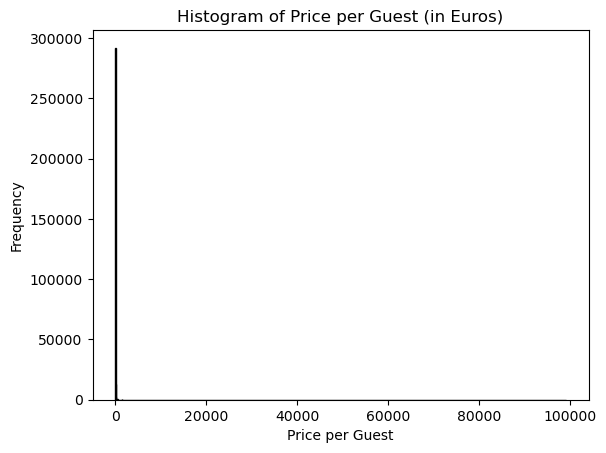

In [32]:
# now, we can plot the distribution of the prices per guest to detect any outliers

# Since the maximal value is so high, we will account for it in the histogram for now. 
# For clarity and run time, we will use bins of width 100 for now so as to get an initial idea of the distribution
plt.hist(all_listing_df_7['price_per_guest'], bins=range(0, 99150, 100), edgecolor='black')  
plt.xlabel('Price per Guest')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Guest (in Euros)')
plt.show()

In [33]:
# This is clearly inefficient since pretty much all of the data is much lower. We will thus plot a histogram with only data within the 
# bottom 99% percentile of the data. This reduced data set will be stored in a new data frame

percentile_threshold = 0.99

# Calculate the threshold value
threshold_value = all_listing_df_7['price_per_guest'].quantile(percentile_threshold)

# Filter the DataFrame to include only values within the bottom 95% percentile
all_listing_df_8 = all_listing_df_7[all_listing_df_7['price_per_guest'] <= threshold_value]

all_listing_df_8["price_per_guest"].max()


250.0

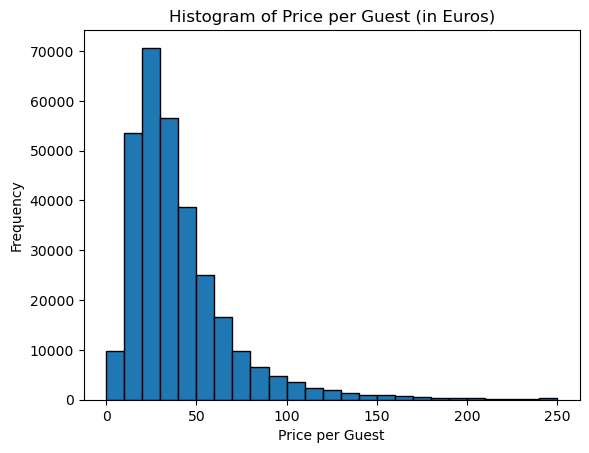

In [34]:
# plot the new histogram:
# The data distribution is a lot narrower here, so we will use bins of 10 values. This is an arbitrary value, but it is allows us to have 
# a clear visualisation of the distribution. 

plt.hist(all_listing_df_8['price_per_guest'], bins=range(0, 260, 10), edgecolor='black')  
plt.xlabel('Price per Guest')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Guest (in Euros)')
plt.show()


In [35]:
# This still seems like too big of a distribution. Considering that we are assuming that our investor has a fairly average budget, it is 
# unlikley that they will be able to afford to buy a property that is expensive enough to be worth more than around 100 euros per night per 
# person. As such, we will narrow down our values such that we only use values in the bottom 95% percentile of the data.

percentile_threshold = 0.95

# Calculate the threshold value
threshold_value = all_listing_df_7['price_per_guest'].quantile(percentile_threshold)

# Overwrite the previous dataframe such that now it includes only values within the bottom 95% percentile of data
all_listing_df_8 = all_listing_df_7[all_listing_df_7['price_per_guest'] <= threshold_value]

all_listing_df_8["price_per_guest"].max()


103.0

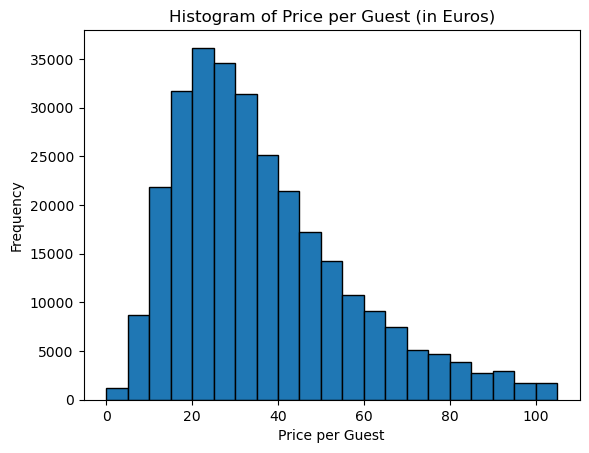

In [36]:
# plot the new histogram:

# note that here we will use bins of width 5, simply because it makes the data cleaner and easier to read. Additionally, it is unrealistic
# that when buying a property the investor knows exactly how much he will be charging per room; it is more likley that they will have a 
# rough idea of the price range. Hence, using bins greater than 1 makes sense!

plt.hist(all_listing_df_8['price_per_guest'], bins=range(0, 110, 5), edgecolor='black')  # bins of 5 values 
plt.xlabel('Price per Guest')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Guest (in Euros)')
plt.show()



As such, the final data frame with all suitable property listings is all_listing_df_8

## Consistency Analysis

Now, we will perform a consistency analysis of the data. Up until now, we have been filtering the listing data. However, we have two sets of data: the listing data and the availability data. As such, the listings that were removed from the listing data should also be removed from the availability data such that it is consistent. 

Additionally, we are interested in the average availability of listings per month and per location (rather than looking at the availability of each single listing). As such, we will create functions to help us iterate through all of the locations' availability data, remove the listings that were removed in the listings data and then calculate the average availability of the location. This new data will be saved in a separate data frame.   

In [37]:

def load_rental_data(city_name):
    """
    Load rental data for a specific city from a subdirectory.
    
    Parameters:
    - city_name (str): The name of the city.

    Returns:
    - pd.DataFrame: The loaded DataFrame.
    """
    # Construct the directory path based on the city name
    directory_path = f"home_rentals/{city_name}"
    
    # Assuming the file is named 'calendar.csv.gz'
    file_path = f"{directory_path}/calendar.csv.gz"
    
    try:
        # Load the DataFrame from the specified file
        df = pd.read_csv(file_path, compression='gzip')
        
        # You can perform additional processing on the DataFrame if needed
        
        # Return the loaded DataFrame
        return df
    except FileNotFoundError:
        # Handle the case where the file is not found
        print(f"Data not found for {city_name}. Check the directory path and file name.")
        return None
    

def filter_ids(df1, df2):
    """
    Filter out ID values in df1 that are not available in df2.

    Parameters:
    - df1 (pd.DataFrame): The first DataFrame.
    - df2 (pd.DataFrame): The second DataFrame.
    - id_column (str): The column containing the ID values.

    Returns:
    - pd.DataFrame: The filtered DataFrame.
    """
    id_column = "id"
    filtered_df = df1[df1["listing_id"].isin(df2["id"])]
    return filtered_df



def averageavaliability(city, latest_df):

    cityname = city
    citydata = load_rental_data(cityname) 

    #filter our ID's that are NOT present in our cleaned all_listings 

    filtered_citydata = filter_ids(citydata, latest_df)
    
    filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
    filtered_citydata["month"] = filtered_citydata["date"].dt.month
    filtered_citydata["year"] = filtered_citydata["date"].dt.year
    filtered_citydata['month_year'] = filtered_citydata['month'].astype(str) + '-' + filtered_citydata['year'].astype(str)

    # make a new data frame
    ave_month = (filtered_citydata[filtered_citydata['available'] == 't'].groupby(['listing_id', 'month_year']).size().unstack(fill_value=0).stack().reset_index(name='days_available'))
    
    # Calculate the average days_available for each month_year (making sure that it rounds to full numbers)
    ave_month = (ave_month.groupby('month_year')['days_available'].mean().round(0).reset_index(name='average_days_available'))
    # convert the month_year column to datetime format 
    ave_month['month_year'] = pd.to_datetime(ave_month['month_year'], format='%m-%Y').dt.to_period('M')

    # sort the rows by ascending dates
    ave_month = ave_month.sort_values('month_year')

    # reset the row index
    ave_month.reset_index(drop=True, inplace=True)

    ave_month['location'] = city

    return ave_month




In [38]:
# Run the above functions for each location, and concatenate the data for each location to a global dataframe (called average_by_month)

all_locations = all_listing_df_8["location"].unique()

average_by_month = pd.DataFrame()

for location in all_locations:
    ave_month = averageavaliability(location, all_listing_df_8)
    average_by_month = pd.concat([average_by_month, ave_month], axis=0)
    print(location)


    

/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Zurich


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Barcelona


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Milan


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Valencia


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Mallorca


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Washington


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Rotterdam


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Tokyo


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Los Angeles


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Lisbon


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Ireland


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Mexico City
Madrid


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Geneva


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Euskadi


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Vienna


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Vancouver


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

San Diego


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Menorca


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Naples


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Toronto


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

San Francisco


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Winnipeg


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Rome


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Malta


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Amsterdam


/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["date"] = pd.to_datetime(filtered_citydata["date"])
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_citydata["month"] = filtered_citydata["date"].dt.month
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/1460293411.py:60: SettingWithCopyWarning: 
A value is tryi

Malaga


In [39]:
# note that all of the properties in Madrid have no listing ID in the listings data file. Thus, we cannot merge the calendar and the listings
# data for the city because we do not have the corresponding IDs. As such, the function removed all of the Madrid properties. 

average_by_month["location"].unique()

array(['Zurich', 'Barcelona', 'Milan', 'Valencia', 'Mallorca',
       'Washington', 'Rotterdam', 'Tokyo', 'Los Angeles', 'Lisbon',
       'Ireland', 'Mexico City', 'Geneva', 'Euskadi', 'Vienna',
       'Vancouver', 'San Diego', 'Menorca', 'Naples', 'Toronto',
       'San Francisco', 'Winnipeg', 'Rome', 'Malta', 'Amsterdam',
       'Malaga'], dtype=object)

### Correcting for additional months

When looking through the average_by_month dataframe, we find that there are some locations that have data for more months than others. However, we want to have an unbiased comparison of the locations, thus we will only keep 1 year worth of data and remove the additional months. Note that the data will range from September 2022 until September 2023; this is technically 13 months, however the data for September 2022 does not cover the whole month (the listing data does not start from the 1st of September), thus to have a clearer idea about the actual demand for the month of September we will also keep September 2023 in the data. 

In [40]:
# check for the unique "month_year" vaues in the average_by_month dataframe. This allows us to see what months are covered by the data
average_by_month["month_year"].unique()


<PeriodArray>
['2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
 '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10']
Length: 14, dtype: period[M]

In [41]:
# All of the locations should have data from 2022-09 until 2023-09. From above, we see that some locations also have 2023-10
# loop through the dataframe and remove observations in 2023-10 for any locations that may have them

# Create a boolean mask based on the specified conditions
mask = average_by_month['month_year'] == "2023-10"

# Use the boolean mask to filter the DataFrame and keep only the rows that don't match the conditions
average_by_month = average_by_month[~mask]

# check that we got the result we wanted
average_by_month["month_year"].value_counts()



2022-09    26
2022-10    26
2022-11    26
2022-12    26
2023-01    26
2023-02    26
2023-03    26
2023-04    26
2023-05    26
2023-06    26
2023-07    26
2023-08    26
2023-09    26
Freq: M, Name: month_year, dtype: int64

## Seasonality Analysis

The final analysis we will perform concerns the seasonality for each month in each location; a seasonality index (= (average days available in a given month AND LOCATION / average days available in a given month THROUGHOUT THE WHOLE DATA SET) * 100%) will be calculate for each one. This seasonality index allows us to compare the average availability between locations, and also to have an idea of how consistent the bookings are per month for each location.

In [42]:
# Calculate the seasonality index for each month of each location

# find the average availability per month between all locations
seasonality_df = average_by_month
seasonality_df['Average'] = seasonality_df.groupby('month_year')['average_days_available'].transform('mean')

# calculate the seasonality index for each location's month and append it to the dataframe 
seasonality_df['Seasonality_Index_%'] = round((seasonality_df['average_days_available'] / seasonality_df['Average']) * 100,1)

# remove the Average column since it is no longer needed
#seasonality_df = seasonality_df.drop("Average", axis=1)

# show the data frame 
seasonality_df




,month_year,average_days_available,location,Average,Seasonality_Index_%
0,2022-09,1.0,Zurich,3.730769,26.8
1,2022-10,9.0,Zurich,14.269231,63.1
2,2022-11,14.0,Zurich,18.500000,75.7
3,2022-12,16.0,Zurich,19.038462,84.0
4,2023-01,17.0,Zurich,19.307692,88.0
...,...,...,...,...,...
8,2023-05,17.0,Malaga,16.576923,102.6
9,2023-06,17.0,Malaga,15.500000,109.7
10,2023-07,16.0,Malaga,15.500000,103.2
11,2023-08,16.0,Malaga,15.730769,101.7


As can be seen above, the seasonality index is given as a percentage. A seasonality index value above 100% indicates a period of higher availability compared to the average. A seasonality index value below 100%, instead, indicates a period of lower availability compared to the average. Finally, a seasonality index of 100% suggests that the availability is in line with the average, without any significant seasonal deviation.

In order to visualise the above results better, we will generate a bar graph for each location showing the average days available and the seasonality of each month in the location. In this way, we can get a better idea of the actual days of availability per month in each location, and how this value compares with other locations.

/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/3464662411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_given_location['month_year'] = season_given_location['month_year'].astype(str)
/var/folders/hq/s17lkcqx1rz063zjymbg6mrw0000gn/T/ipykernel_7663/3464662411.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_name['month_year'] = location_name['month_year'].astype(str)


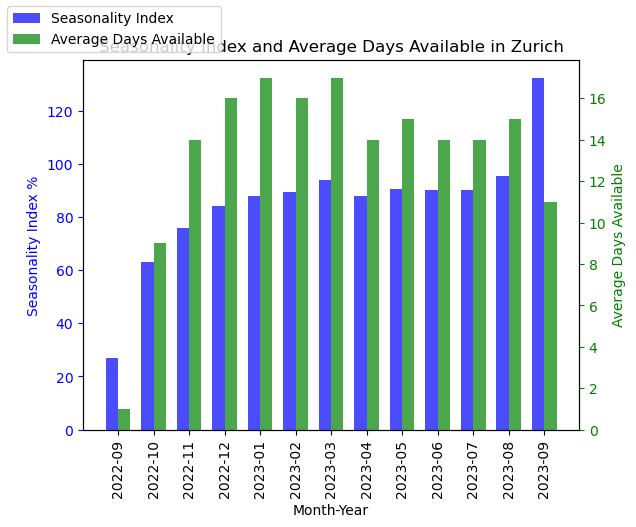

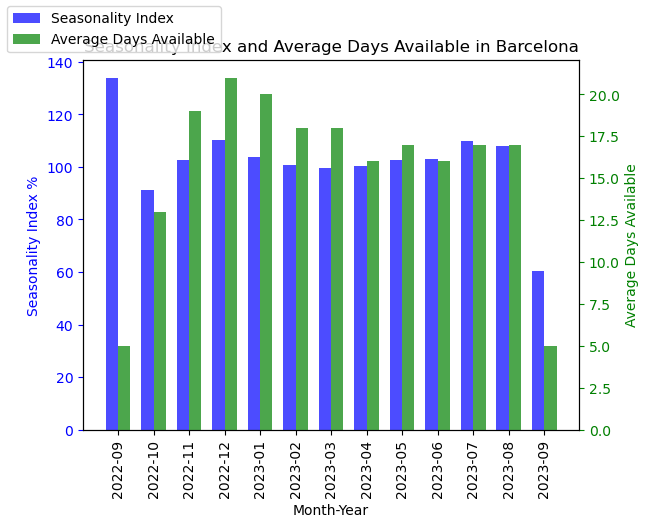

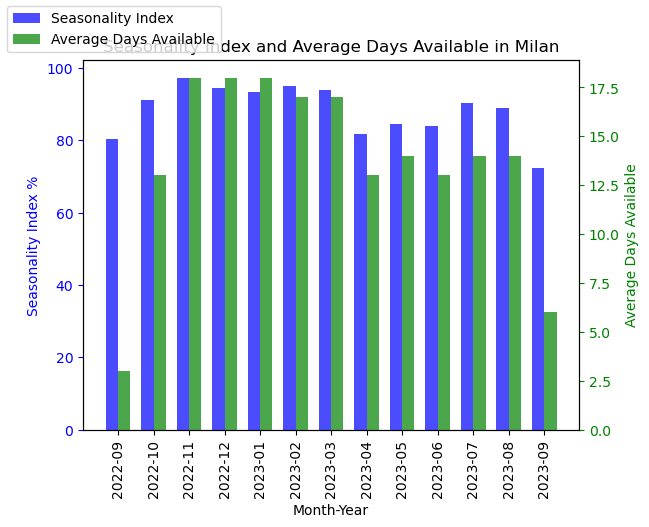

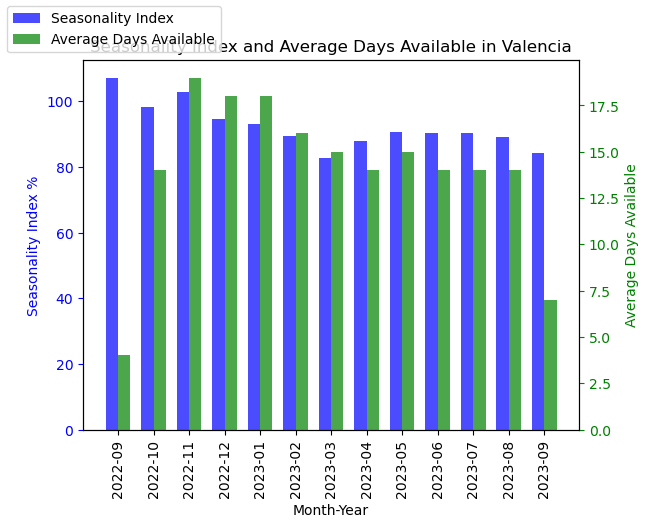

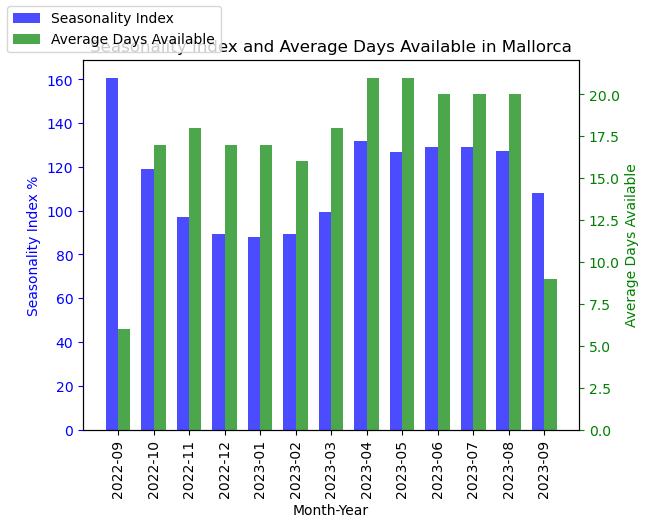

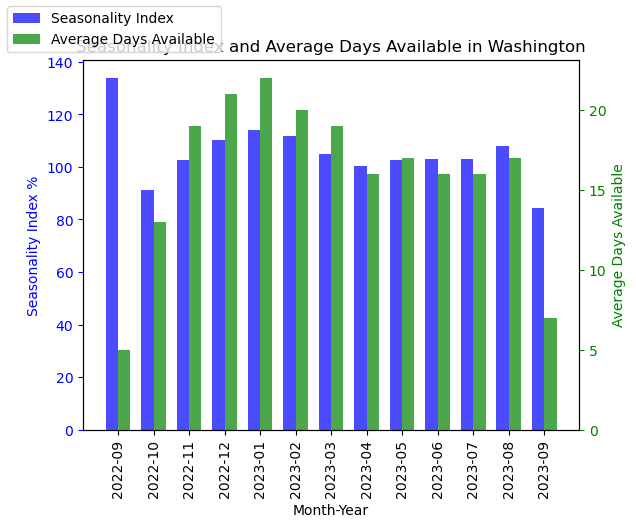

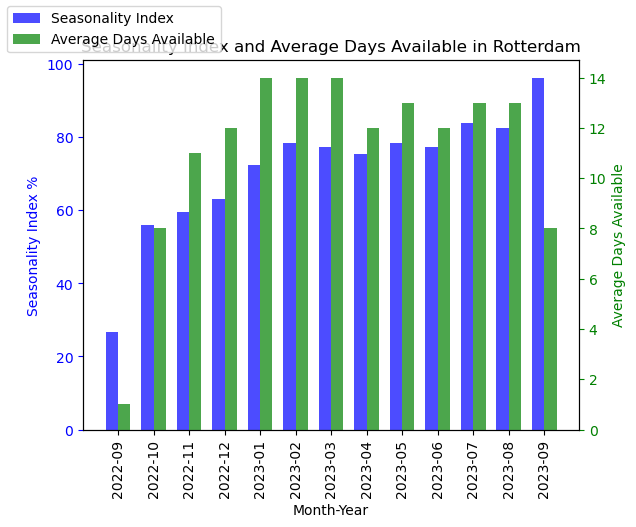

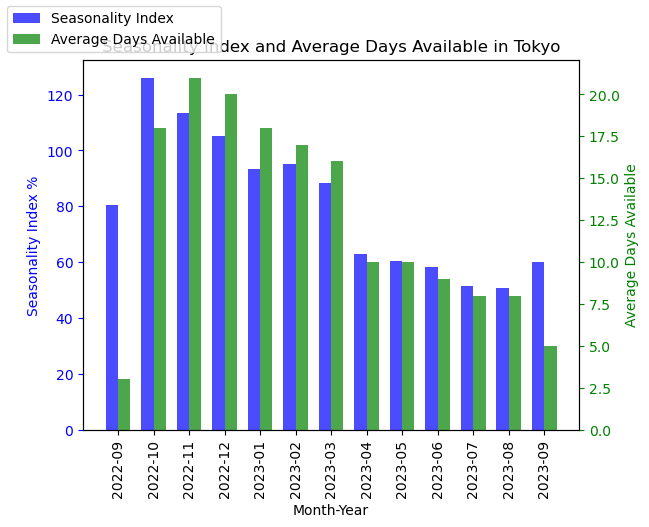

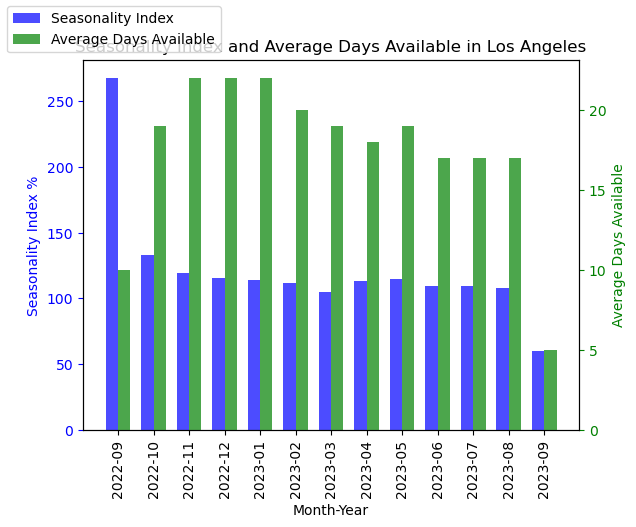

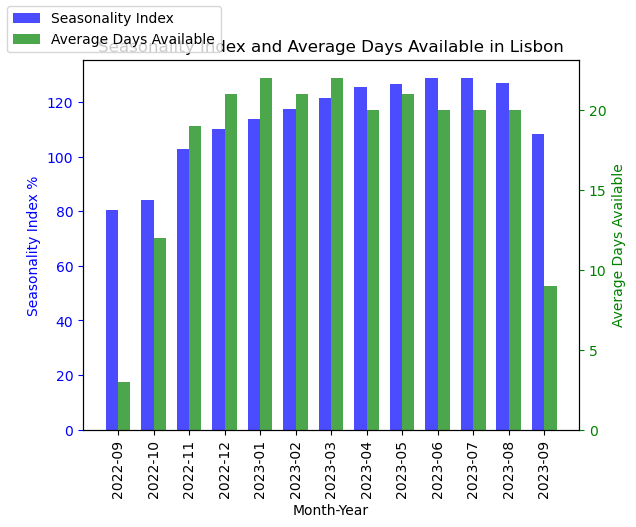

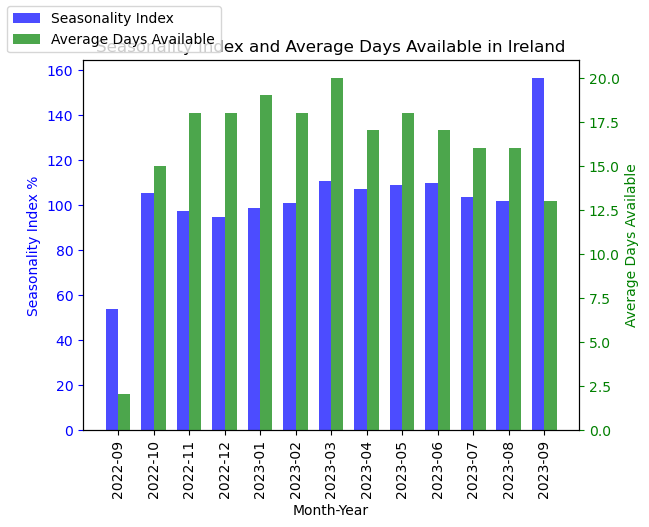

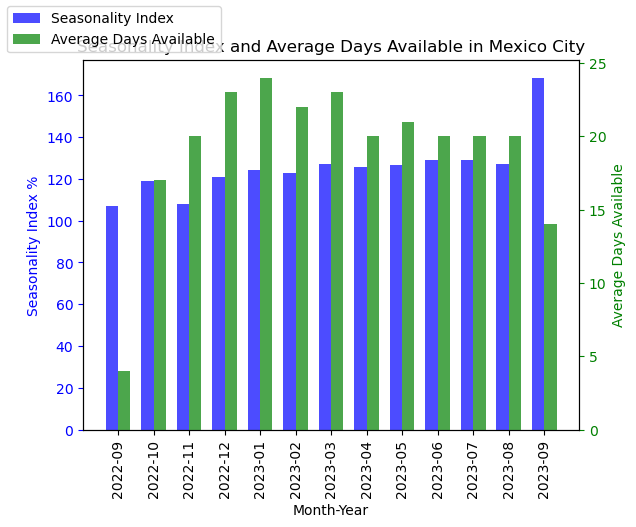

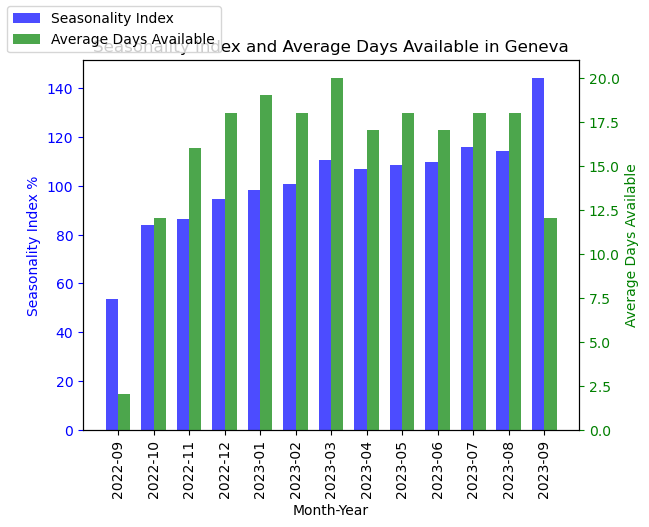

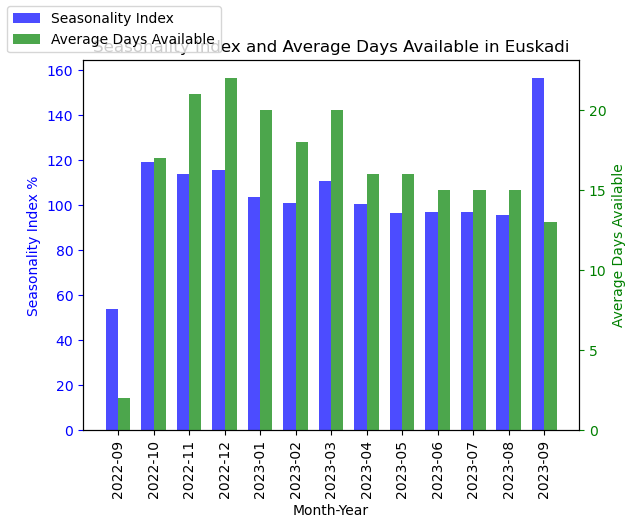

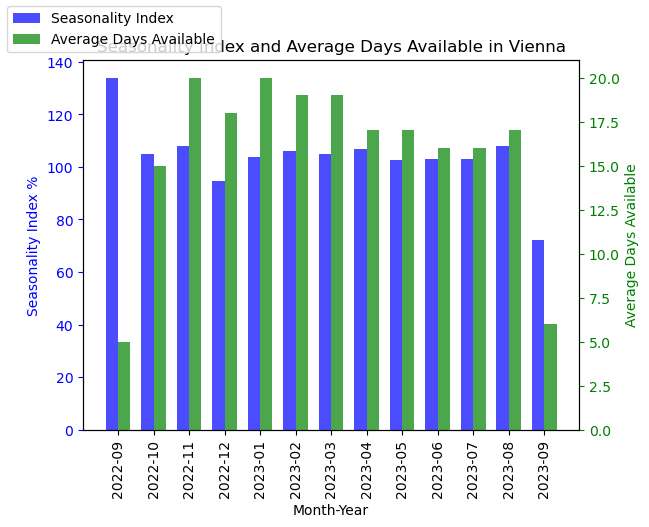

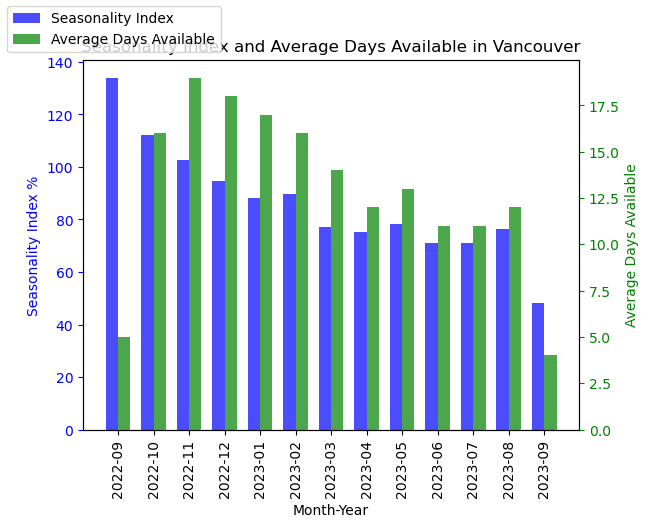

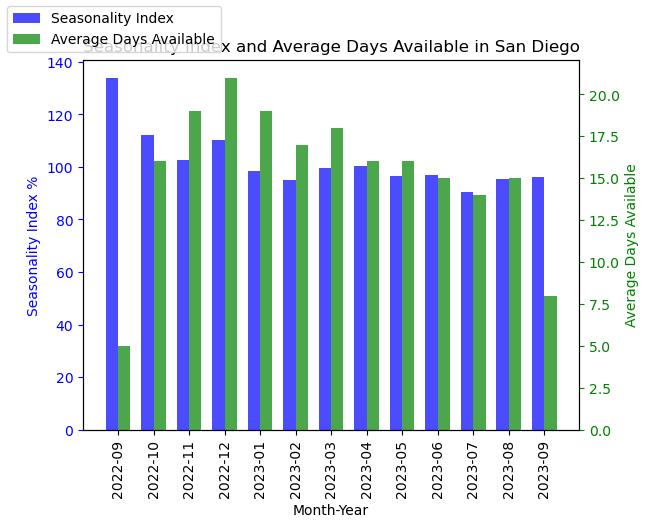

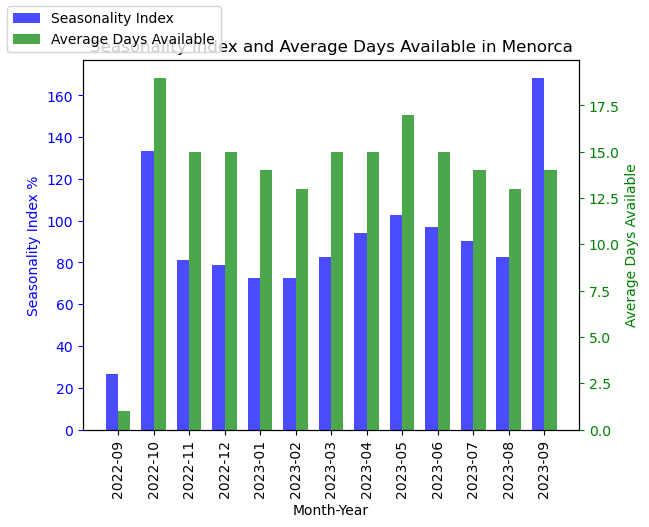

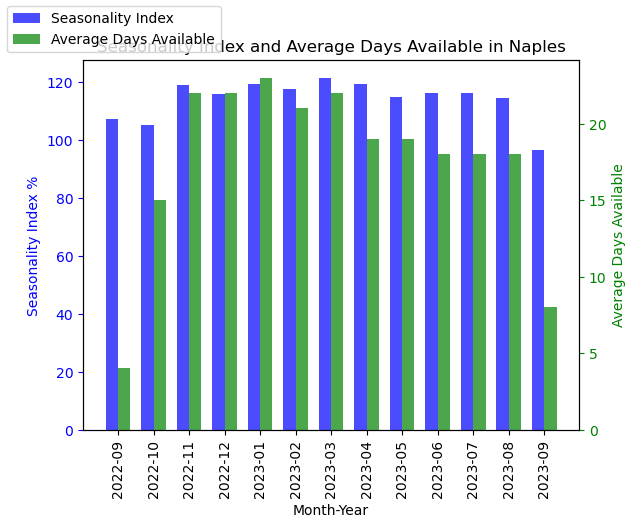

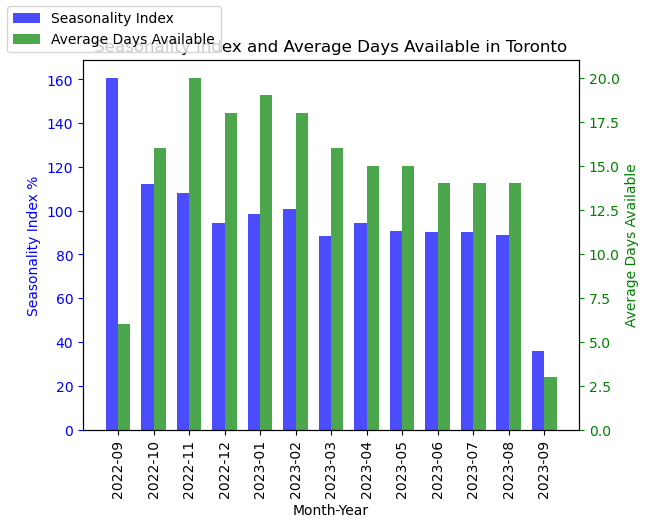

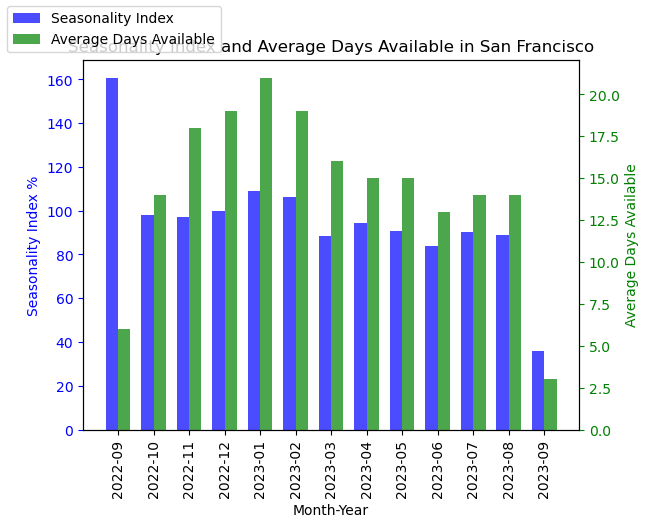

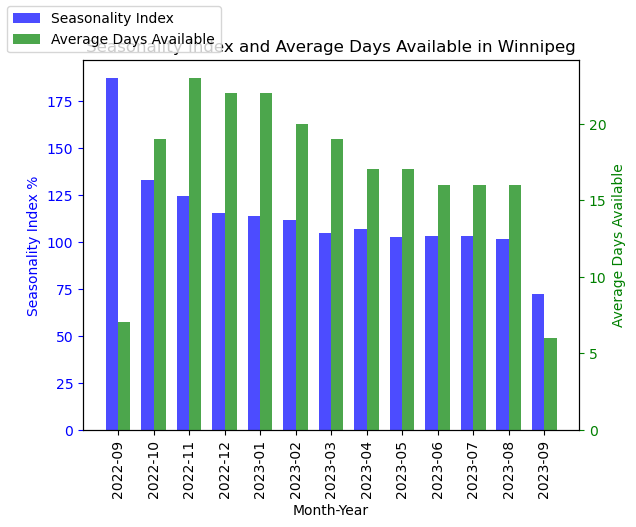

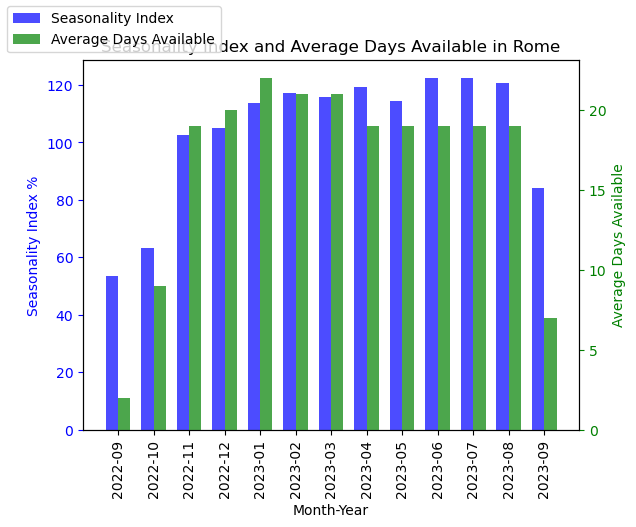

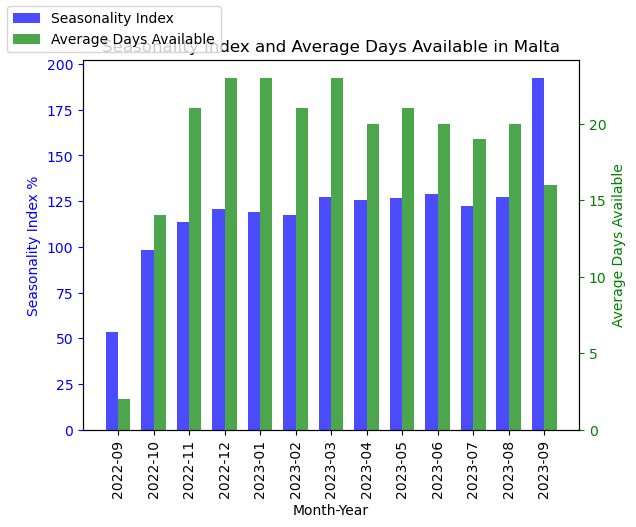

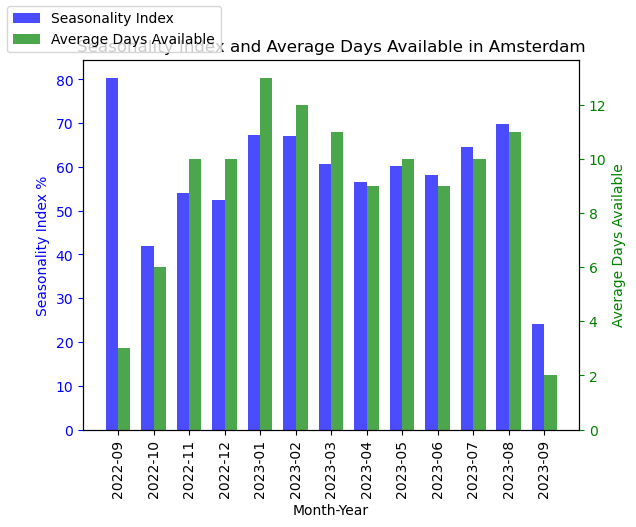

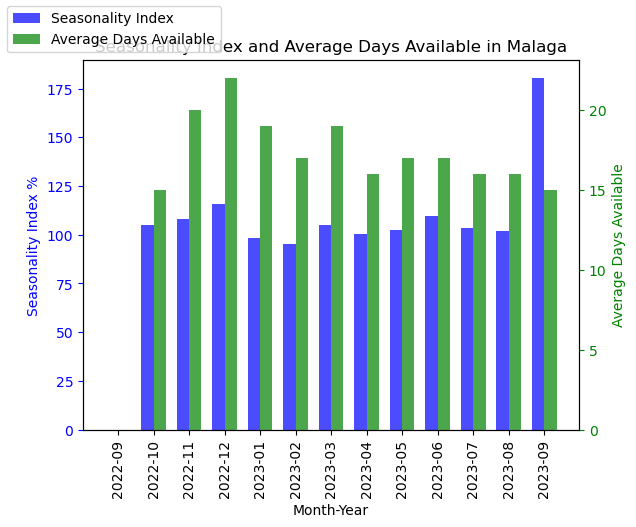

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the monthly availability and seasonality index for each location

all_the_locations = average_by_month["location"].unique()

# Set the width of the bars
bar_width = 0.35

# Make the bar charts
for location in all_the_locations:

    season_given_location = seasonality_df[seasonality_df["location"] == location]
    location_name = average_by_month[average_by_month['location'] == location]

    av_si = season_given_location['Seasonality_Index_%']
    av_availability = location_name['average_days_available']

    season_given_location['month_year'] = season_given_location['month_year'].astype(str)
    location_name['month_year'] = location_name['month_year'].astype(str)

    # Create a figure and primary y-axis
    fig, ax1 = plt.subplots()

    # Plot Seasonality Index on the primary y-axis
    ax1.bar(np.arange(len(season_given_location['month_year'])), av_si, width=bar_width, color='blue', alpha=0.7, label='Seasonality Index')
    ax1.set_xlabel('Month-Year')
    ax1.set_ylabel('Seasonality Index %', color='blue')
    ax1.tick_params('y', colors='blue')
    ax1.set_title(f'Seasonality Index and Average Days Available in {location}')

    # Create a twin Axes sharing the x-axis
    ax2 = ax1.twinx()

    # Plot Average Days Available on the secondary y-axis
    ax2.bar(np.arange(len(location_name['month_year'])) + bar_width, av_availability, width=bar_width, color='green', alpha=0.7, label='Average Days Available')
    ax2.set_ylabel('Average Days Available', color='green')
    ax2.tick_params('y', colors='green')

    # Set x-axis ticks and labels
    ax1.set_xticks(np.arange(len(season_given_location['month_year'])) + bar_width / 2)
    ax1.set_xticklabels(season_given_location['month_year'], rotation=90)

    # Display the legend
    fig.legend(loc='upper left')

    # Show the plot
    plt.show()


The graphs above allow us to gain a better understanding of the distribution of our data; however, there is too much data (and thus it is too specific) for it to be useful when performing further analyses and building models. As such, we will calculate a single seasonality index for each location. 

In [44]:
# Calculate the seasonality index for each location

# find the average availability for each locations
seasonality_per_location_df = pd.DataFrame()

seasonality_per_location_df["location"] = average_by_month["location"].unique()

# calculate one average availability per location
for location in all_locations:
    average_avail_per_loc_df = average_by_month.groupby('location')['average_days_available'].mean().reset_index()

# add the average availability of each location to the data frame:
seasonality_per_location_df["average_availability"] = average_avail_per_loc_df["average_days_available"]

# calculate the average availabiity between all locations
average_availbility = average_avail_per_loc_df["average_days_available"].mean()

# calculate the seasonality index for each location and append it to the dataframe 
seasonality_per_location_df['Seasonality_Index_%'] = round((seasonality_per_location_df["average_availability"] / average_availbility) * 100,1)

# show the data frame 
seasonality_per_location_df


,location,average_availability,Seasonality_Index_%
0,Zurich,8.923077,58.5
1,Barcelona,15.538462,101.8
2,Milan,16.153846,105.9
3,Valencia,15.769231,103.3
4,Mallorca,15.923077,104.3
5,Washington,17.692308,115.9
6,Rotterdam,17.461538,114.4
7,Tokyo,16.076923,105.4
8,Los Angeles,16.923077,110.9
9,Lisbon,18.692308,122.5


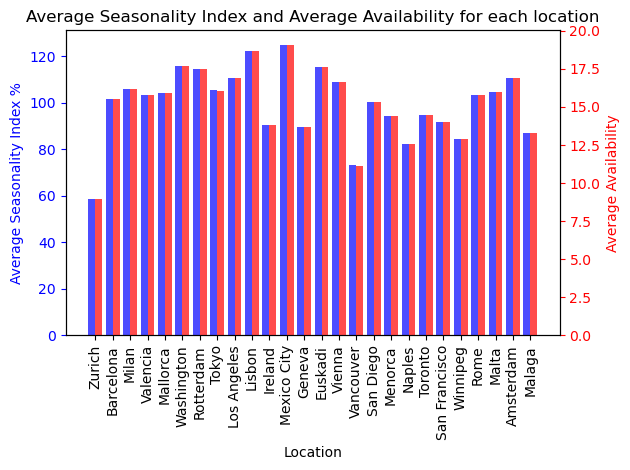

In [45]:
# let's plot the seasonality index and average availability of all locations on one graph:

import matplotlib.pyplot as plt
import numpy as np

# make the bar chart
fig, ax1 = plt.subplots()
bar_width = 0.4
indices = np.arange(len(seasonality_per_location_df['location']))

# plot first axis
ax1.bar(indices - bar_width / 2, seasonality_per_location_df['Seasonality_Index_%'], color='b', alpha=0.7, label='Average Seasonality Index %', width=bar_width)
ax1.set_xlabel('Location')
ax1.set_ylabel('Average Seasonality Index %', color='b')
ax1.set_xticks(indices)
ax1.set_xticklabels(seasonality_per_location_df['location'], rotation=90)  # Rotate x-axis labels vertically
ax1.tick_params('y', colors='b')

# Twin axis for Average Availability on the right axis
ax2 = ax1.twinx()
# Adjust the x-coordinates for the second set of bars
ax2.bar(indices + bar_width / 2, seasonality_per_location_df['average_availability'], color='r', alpha=0.7, label='Average Availability', width=bar_width)
ax2.set_ylabel('Average Availability', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Average Seasonality Index and Average Availability for each location')
fig.tight_layout()
plt.show()

As expected, the average seasonality index and the average availability distributions exactly match each other. This is because, to calculate the seasonality, we are simply taking the average availability of the location and multiplying it by a constant ( = average availability of the location * (100 / average availability of data set)). Thus, in this form the seasonality index gives the same information as the availability, and thus will be discared in future analysis (as the availability data will be used). 

Note that in order to make the seasonality index useful, we would have to calculate an index for periods of the year (e.g. quarters or seasons). However, this will make the results difficult to combine with the rest of the data, and since extensive analysis has already been performed we have determined that this is superfluous. 

## Revenue

Although the seasonality index gives us a good insight of the general distribution of availabilities of locations, we still need to calculate revenue. This is because the objective of the analysis del is to tell an investor where the best location to buy a property destined to be rented out on Airbnb would be/

First of all, we have to define the metric that we want our models to calculate. In this case, we want the models to tell us what the most profitable location to buy a property to then rent on Airbnb would be. We can calculate revenue by calculating how many nights on average properties in each location are booked per month multiplied by the average price per guest paid per night. 

In [46]:
# first, have to find the average price_per_guest per location

# create the new data frame 
average_ppg_per_location_wM = all_listing_df_8.groupby('location')['price_per_guest'].mean().reset_index(name='average_price_per_guest')

# round the values to 2 decimal places
average_ppg_per_location_wM['average_price_per_guest'] = round(average_ppg_per_location_wM['average_price_per_guest'],2)

# also, have to remember to remove the data for Madrid since the ave_month data frame doesn't have any data for it (as explained earlier)
average_ppg_per_location = average_ppg_per_location_wM[average_ppg_per_location_wM['location'] != "Madrid"]

# reset the index
average_ppg_per_location = average_ppg_per_location.reset_index(drop=True)

# show the new data frame
average_ppg_per_location


,location,average_price_per_guest
0,Amsterdam,60.68
1,Barcelona,35.74
2,Euskadi,35.02
3,Geneva,42.50
4,Ireland,36.44
5,Lisbon,32.82
6,Los Angeles,45.41
7,Malaga,27.96
8,Mallorca,41.39
9,Malta,27.28


In [47]:
# Next, calculate the average monthly availability of each location (note that the latter comes from the average_by_month dataframe)

average_availbility_per_location = pd.DataFrame()

average_availbility_per_location["location"] = average_by_month["location"].unique()

# calculate one average availability per location
for location in all_locations:
    average_availbility_per_location = average_by_month.groupby('location')['average_days_available'].mean().reset_index()

# show the data frame
average_availbility_per_location

,location,average_days_available
0,Amsterdam,8.923077
1,Barcelona,15.538462
2,Euskadi,16.153846
3,Geneva,15.769231
4,Ireland,15.923077
5,Lisbon,17.692308
6,Los Angeles,17.461538
7,Malaga,16.076923
8,Mallorca,16.923077
9,Malta,18.692308


In [49]:
# we then have to use the average availability per location to calculate the average days booked 
# since we have an average value for each month, we will have to use the average days between all months to find the days booked (note that 
# 2023 was not a leap year, thus take 29 days for february). 

average_days_in_month = (31*7 + 30*4 + 28)/12

average_bookings_per_location = pd.DataFrame()

average_bookings_per_location["location"] = average_availbility_per_location['location']
average_bookings_per_location["average_days_booked"] = average_days_in_month - average_availbility_per_location["average_days_available"]

# round to a full number of days
average_bookings_per_location["average_days_booked"] = round(average_bookings_per_location["average_days_booked"],0)

# show dataframe
average_bookings_per_location



,location,average_days_booked
0,Amsterdam,21.0
1,Barcelona,15.0
2,Euskadi,14.0
3,Geneva,15.0
4,Ireland,14.0
5,Lisbon,13.0
6,Los Angeles,13.0
7,Malaga,14.0
8,Mallorca,13.0
9,Malta,12.0


In [52]:
# now, we can calculate the revenue by multiplying the average price paid per guest in each location with the average days booked in each 
# location (this value is for a month)

revenue_per_location = pd.DataFrame()

# add a location and revenue column
revenue_per_location["location"] = average_bookings_per_location["location"]
revenue_per_location["revenue"] = 0


# calculate the revenue per column and write it in
for location in revenue_per_location["location"]:
    revenue_per_location.loc[revenue_per_location["location"]== location, "revenue"] = average_bookings_per_location.loc[average_bookings_per_location["location"] == location, "average_days_booked"] * average_ppg_per_location.loc[average_ppg_per_location["location"] == location, 'average_price_per_guest']

# show the data frame
revenue_per_location

,location,revenue
0,Amsterdam,1274.28
1,Barcelona,536.10
2,Euskadi,490.28
3,Geneva,637.50
4,Ireland,510.16
5,Lisbon,426.66
6,Los Angeles,590.33
7,Malaga,391.44
8,Mallorca,538.07
9,Malta,327.36


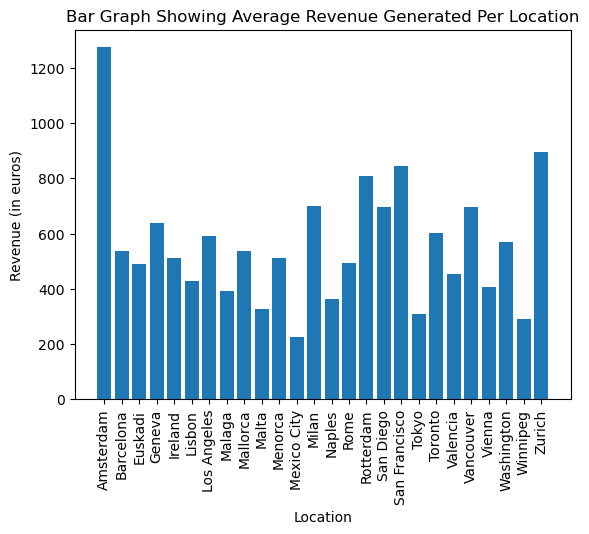

In [53]:
# finally, let's plot the revenue of each location so that we can compare them more easily 

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(revenue_per_location['location'], revenue_per_location['revenue'])

# Adding labels and title
plt.xlabel('Location')
plt.ylabel('Revenue (in euros)')
plt.title('Bar Graph Showing Average Revenue Generated Per Location')

# Rotating x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

Thus, we find that in terms of revenue, the best location for an investor to buy a property in (so as to then rent it via Airbnb) is Amsterdam, with an average revenue of 1274.28 Euros per month and per guest.

# Model Generation

## Linear regression

In [54]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
X = all_listing_df_8.drop('availability_365', axis=1)
y = all_listing_df_8['availability_365']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12345)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
all_listing_df_8.columns

Index(['id', 'property_type', 'room_type', 'accommodates', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_365', 'location', 'Euro_price', 'price_per_guest'],
      dtype='object')

In [58]:
columns_to_drop = ['id', 'price', 'price_per_guest']

# Assuming df is your DataFrame

all_listing_df_9 = all_listing_df_8.drop(columns_to_drop, axis=1)
# Drop rows with NaN values
df_cleaned = all_listing_df_9.dropna()

In [59]:


# One-Hot Encode the Categorical Variables
df_encoded = pd.get_dummies(
    df_cleaned, columns=['property_type', 'room_type', 'location'])

# Split Data into Features (X) and Target (y)
# Assuming 'price' is your target variable
X = df_encoded.drop(['availability_365'], axis=1)
y = df_encoded['availability_365']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

In [60]:
'''
#with label encoded (each column)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your cleaned DataFrame

# Initialize LabelEncoders
le_property_type = LabelEncoder()
le_room_type = LabelEncoder()
le_location = LabelEncoder()

# Apply LabelEncoder to each categorical column
df_cleaned['property_type_encoded'] = le_property_type.fit_transform(
    df_cleaned['property_type'])
df_cleaned['room_type_encoded'] = le_room_type.fit_transform(
    df_cleaned['room_type'])
df_cleaned['location_encoded'] = le_location.fit_transform(
    df_cleaned['location'])

# Drop original categorical columns
df_cleaned.drop(['property_type', 'room_type', 'location'],
                axis=1, inplace=True)

# Split Data into Features (X) and Target (y)
# Assuming 'availability_365' is your target variable
X = df_cleaned.drop(['availability_365'], axis=1)
y = df_cleaned['availability_365']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

df_cleaned

'''

"\n#with label encoded (each column)\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder\n\n# Assuming df_cleaned is your cleaned DataFrame\n\n# Initialize LabelEncoders\nle_property_type = LabelEncoder()\nle_room_type = LabelEncoder()\nle_location = LabelEncoder()\n\n# Apply LabelEncoder to each categorical column\ndf_cleaned['property_type_encoded'] = le_property_type.fit_transform(\n    df_cleaned['property_type'])\ndf_cleaned['room_type_encoded'] = le_room_type.fit_transform(\n    df_cleaned['room_type'])\ndf_cleaned['location_encoded'] = le_location.fit_transform(\n    df_cleaned['location'])\n\n# Drop original categorical columns\ndf_cleaned.drop(['property_type', 'room_type', 'location'],\n                axis=1, inplace=True)\n\n# Split Data into Features (X) and Target (y)\n# Assuming 'availability_365' is your target variable\nX = df_cleaned.drop(['availability_365'], axis=1)\ny = df_cleaned['availability_365']\n\n# Split the 

In [61]:


# Fit the Model on the Training Data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)

# Calculate Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

ValueError: could not convert string to float: '["Stove", "Microwave", "Cooking basics", "Shampoo", "Kitchen", "Essentials", "Hangers", "Paid parking off premises", "Bed linens", "Extra pillows and blankets", "Iron", "Private entrance", "Refrigerator", "Wifi", "Hot water", "TV", "Dishes and silverware"]'

In [62]:
df_encoded

,accommodates,amenities,minimum_nights,maximum_nights,availability_30,availability_365,Euro_price,property_type_Entire bungalow,property_type_Entire condo,property_type_Entire cottage,...,location_San Diego,location_San Francisco,location_Tokyo,location_Toronto,location_Valencia,location_Vancouver,location_Vienna,location_Washington,location_Winnipeg,location_Zurich
1,3.0,"[""Essentials"", ""Indoor fireplace"", ""Kitchen"", ...",1,9999.0,0.0,0.0,193.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,"[""Kitchen"", ""Lake access"", ""Wifi"", ""Long term ...",5,31.0,0.0,221.0,63.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,"[""Wifi"", ""Long term stays allowed"", ""Microwave...",2,30.0,0.0,208.0,72.45,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,"[""Essentials"", ""Cleaning products"", ""Wifi"", ""L...",5,30.0,6.0,6.0,163.80,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1.0,"[""Essentials"", ""Free parking on premises"", ""Wi...",1,1125.0,3.0,310.0,75.60,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342230,4.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",5,90.0,4.0,5.0,72.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342231,6.0,"[""Heating"", ""Private patio or balcony"", ""Dishe...",21,60.0,0.0,0.0,265.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342232,2.0,"[""Heating"", ""Hair dryer"", ""Crib"", ""Extra pillo...",5,1125.0,3.0,3.0,31.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342233,4.0,"[""Heating"", ""Hair dryer"", ""Coffee maker"", ""42\...",3,1125.0,0.0,2.0,90.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# RMSE was already calculated in your code, but here it is again for reference
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

NameError: name 'y_pred' is not defined

In [ ]:
r2 = r2_score(y_test, y_pred)
r2_percentage = r2 * 100

print(f"R-squared (as a percentage): {r2_percentage:.2f}%")

R-squared (as a percentage): 26.62%


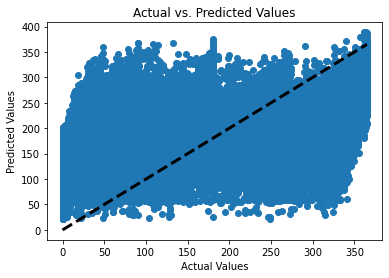

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=3)  # Line for perfect predictions
plt.show()

## KNN

We will also try to build a model using KNN (k-Nearest Neighbors). As before, we are trying to predict the average profitability of each location so as to find what the most profitable location to buy a property in is. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# SUGGESTION TO IMPROVE MODEL PERFORMANCE : add back bedrooms and amenities







In [ ]:
"""

# econdings for property type, room type and location ALREADY DONE DONT NEED

# Use scikit-learn's OneHotEncoder
encoder = OneHotEncoder(sparse=False)

ptype_encoded = encoder.fit_transform(all_listing_df_8[['property_type']])

# Convert to DataFrame for better visualization
ptype_df = pd.DataFrame(ptype_encoded, columns=encoder.get_feature_names(['property_type']))


#for room type 
encoder = OneHotEncoder(sparse=False)

rtype_encoded = encoder.fit_transform(all_listing_df_8[['room_type']])

# Convert to DataFrame with correct number of columns

rtype_df = pd.DataFrame(rtype_encoded, columns=encoder.get_feature_names(['room_type']))


#for location


location_encoded = encoder.fit_transform(all_listing_df_8[['location']])


location_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names(['location']))

"""

"\n\n# econdings for property type, room type and location\n\n# Use scikit-learn's OneHotEncoder\nencoder = OneHotEncoder(sparse=False)\n\nptype_encoded = encoder.fit_transform(all_listing_df_8[['property_type']])\n\n# Convert to DataFrame for better visualization\nptype_df = pd.DataFrame(ptype_encoded, columns=encoder.get_feature_names(['property_type']))\n\n\n#for room type \nencoder = OneHotEncoder(sparse=False)\n\nrtype_encoded = encoder.fit_transform(all_listing_df_8[['room_type']])\n\n# Convert to DataFrame with correct number of columns\n\nrtype_df = pd.DataFrame(rtype_encoded, columns=encoder.get_feature_names(['room_type']))\n\n\n#for location\n\n\nlocation_encoded = encoder.fit_transform(all_listing_df_8[['location']])\n\n\nlocation_df = pd.DataFrame(location_encoded, columns=encoder.get_feature_names(['location']))\n\n"

In [ ]:
df_encoded

,accommodates,minimum_nights,maximum_nights,availability_30,availability_365,Euro_price,property_type_Entire bungalow,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,...,location_San Diego,location_San Francisco,location_Tokyo,location_Toronto,location_Valencia,location_Vancouver,location_Vienna,location_Washington,location_Winnipeg,location_Zurich
1,3.0,1,9999.0,0.0,0.0,193.20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,5,31.0,0.0,221.0,63.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,2,30.0,0.0,208.0,72.45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,5,30.0,6.0,6.0,163.80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1.0,1,1125.0,3.0,310.0,75.60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342230,4.0,5,90.0,4.0,5.0,72.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342231,6.0,21,60.0,0.0,0.0,265.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342232,2.0,5,1125.0,3.0,3.0,31.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342233,4.0,3,1125.0,0.0,2.0,90.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_encoded.drop(['availability_365'], axis=1)
y = df_encoded['availability_365']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k = 9  # You can choose the value of k based on cross-validation or other techniques (crossval gave 9)
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
# evaluations


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 12877.532318163223
R-squared: 0.27769195236593813


In [ ]:
# tuning hyperparameters 

""" 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Best value for k: {best_k}')

"""

" \nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {'n_neighbors': [3, 5, 7, 9]}\ngrid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)\ngrid_search.fit(X_train_scaled, y_train)\n\nbest_k = grid_search.best_params_['n_neighbors']\nprint(f'Best value for k: {best_k}')\n\n"